# Algoritmo de Simon


Fábio Alves de Freiras  
Raissa Camelo  
Universidade Federal Rural de Pernambuco

## Introdução

O algoritmo de simon trata de encontrar padrões em funções da seguinte forma. Dado uma função  $f:${0,1}$^n$ $\rightarrow$ {0,1}$^n$ na qual $f(x) = f(y)$ se e somente se $x = y \oplus c$. Ou seja, teremos pares de entradas equivalentes. O objetivo do algoritmo é encontrar o valor $c$ que gera este padrão na função de entrada. Podemos analisar melhor o formato de uma função deste gênero com os exemplos abaixo.

---
Exemplo de $função$ com $n = 3:$     

$f(000) = f(111) = 001$  
$f(001) = f(110) = 010$  
$f(010) = f(101) = 100$  
$f(011) = f(100) = 110$  

---

Exemplo de mapeamento para $c = 010:$

$000 \oplus 010 = 010$  
$001 \oplus 010 = 011$  
$010 \oplus 010 = 000$        
$011 \oplus 010 = 001$    
$100 \oplus 010 = 110$   
$101 \oplus 010 = 111$   
$110 \oplus 010 = 100$  
$111 \oplus 010 = 101$

logo a função será: 

$f(000) = f(010)$  
$f(001) = f(011)$  
$f(100) = f(110)$  
$f(101) = f(111)$

---

Exemplo de mapeamento para $c = 000:$

$000 \oplus 000 = 000$  
$001 \oplus 000 = 001$  
$010 \oplus 000 = 010$        
$011 \oplus 000 = 011$    
$100 \oplus 000 = 100$   
$101 \oplus 000 = 101$   
$110 \oplus 000 = 110$  
$111 \oplus 000 = 111$

Caso o $c$ seja uma sequência de zeros $(0^n)$, então a função será um mapeamento de um para um.

---



 ## Complexidade do algoritmo clássico
 
 Para resolver este problema da forma clássica poderíamos fazer da seguinte forma: testar muitas entradas sobre a função e anotar os resultados, se num determinado momento um valor repetido surgisse, então poderiamos descobrir o valor de $c$.

$x_1 \oplus x_2 = c$

Para uma função de strings de comprimento $n$, no pior caso, teríamos que testar metade das strings, na qual todas terial valores diferentes, mais uma adicional, que garantiria que pelo menos um dos testes anteriores teria um valor igual ao último teste.
 
$\dfrac{2^n}{2}+1 =    2^{n-1}+1 = O(2^n)$

Ou seja, a complexidade seria exponencial



## O algoritmo

A solução deste problema mais eficiente utilizando a computação quântica. O funcionamento do algoritmo acontece da seguinte forma: 

1.) Colocamos na entrada duas strings de tamanho $n$ formadas apenas por zero.  
$|\psi_0\rangle = |0\rangle^{\otimes n} \otimes |0\rangle^{\otimes n}$  

2.) Aplicamos o haddamard nos $n$ qubits do topo, deixando-os em superposição.  
$|\psi_1\rangle = (H^{\otimes n} \otimes I^{\otimes n}) |\psi_0\rangle$

3.) Aplicamos o operador $U_f$ sobre os qubits e a função $f$ de entrada.  
$|\psi_2\rangle = U_f |\psi_1\rangle$ 

4.) Aplicamos novamente o haddamard nos $n$ qubits do topo, tirando-os de superposição.  
$|\psi_3\rangle = (H^{\otimes n} \otimes I^{\otimes n}) |\psi_2\rangle$

5.) Medimos os $n$ qubits do topo. Eles formaram um sistema linear. Resolvendo o sistema poderemos determinar o valor de $c$.




## Explicação matemática

FALTA FAZER



## Implementação

A implementação do algoritmo é feita considerando $n = 2$ para a função abaixo:

$f(00) = f(01) = 00$  
$f(10) = f(11) = 11$  


In [1]:
import qiskit as qkit
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
import time
import QconfigFabio as Qconfig
qkit.register(Qconfig.APItoken, Qconfig.config['url'])

In [3]:
#criando 4 qubits, pois para n = 2 teremos essa quantidade como inicializaçao.
rq = qkit.QuantumRegister(size=4)

#criando 2 bits clássico, pois avaliaremos os n qubits do topo.
rc = qkit.ClassicalRegister(size=2)

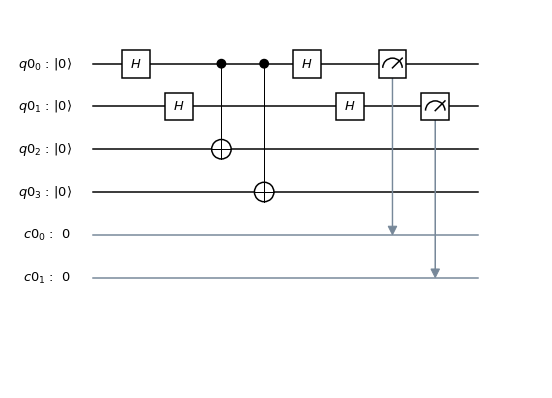

In [6]:
#inicializando os qubits e o bit
simon = qkit.QuantumCircuit(rq, rc)

#hadamard nos n primeiros qubits
simon.h(rq[0])
simon.h(rq[1])

# função de entrada (Uf)
simon.cx(rq[0], rq[2])
simon.cx(rq[0], rq[3])

#hadamard nos n primeiros qubits
simon.h(rq[0])
simon.h(rq[1])

#medição dos n qubits do topo 
simon.measure(rq[0], rc[0])
simon.measure(rq[1], rc[1])
circuit_drawer(simon)

***
## Referências
Yanofsky, Noson S. and Mirco A. MannucciQuantum computing for computer scientists. Cambridge: Cambridge University Press, 2008.  
Nielsen, Michael A., and Isaac Chuang. "Quantum computation and quantum information." (2002): 558-559.